In [112]:
import pandas as pd
import numpy as np
import math
import operator
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC,SVR
dataset_new = pd.read_excel("Dataset.xlsx")
columns = ['ID','Daily spent time in social media (hour)',
                           'Sleep duration','How many days in a week you feel more energetic',
                            "Do you feel low seeing other people's achievement on social media"]
dataset_new_update = dataset_new[columns]
dataset_new_update

,ID,Daily spent time in social media (hour),Sleep duration,How many days in a week you feel more energetic,Do you feel low seeing other people's achievement on social media
0,151340976,2,8.0,5.0,Maybe
1,151340977,2,8.0,3.0,No
2,151340980,1,8.0,5.0,Yes
3,151340981,1,6.0,3.0,No
4,151340982,2,8.0,1.0,No
5,151340983,2,10.0,3.0,Yes
6,151340984,1,6.0,5.0,Maybe
7,151340985,1,6.0,3.0,Maybe
8,151340986,2,6.0,3.0,No
9,151340988,2,6.0,1.0,No


In [117]:
dataset_new_update["Do you feel low seeing other people's achievement on social media"] = dataset_new_update["Do you feel low seeing other people's achievement on social media"].astype('category')
dataset_new_update["Do you feel low seeing other people's achievement on social media"] = pd.factorize(dataset_new_update["Do you feel low seeing other people's achievement on social media"])[0] + 1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
dataset_new_update

,ID,Daily spent time in social media (hour),Sleep duration,How many days in a week you feel more energetic,Do you feel low seeing other people's achievement on social media
0,151340976,2,8.0,5.0,1
1,151340977,2,8.0,3.0,2
2,151340980,1,8.0,5.0,3
3,151340981,1,6.0,3.0,2
4,151340982,2,8.0,1.0,2
5,151340983,2,10.0,3.0,3
6,151340984,1,6.0,5.0,1
7,151340985,1,6.0,3.0,1
8,151340986,2,6.0,3.0,2
9,151340988,2,6.0,1.0,2


In [102]:
#dataset_new_update["Daily spent time in social media (hour)"] = pd.factorize(dataset_new_update["Daily spent time in social media (hour)"])[0] + 1
#dataset_new_update

In [103]:
#dataset_new_update["Sleep duration"] = pd.factorize(dataset_new_update["Sleep duration"])[0] + 1
#dataset_new_update["How many days in a week you feel more energetic"] = pd.factorize(dataset_new["How many days in a week you feel more energetic"])[0] + 1

#dataset_new_update

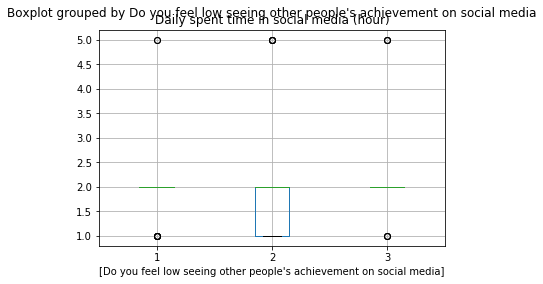

In [119]:
dataset_new_update.boxplot(by=["Do you feel low seeing other people's achievement on social media"], column=['Daily spent time in social media (hour)'], grid= True)

In [150]:
D=dataset_new_update.values
X = D[:,:-1]
y = D[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.22)

In [151]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train.astype(int), Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [152]:
yPred=clf.predict(X_test.astype(int))
acc=accuracy_score(Y_test.astype(int), yPred.astype(int))
print('Accuracy with 5 neighbours: ',acc)

Accuracy with 3 neighbours:  0.5652173913043478


In [153]:
def plot_conf_mat(lTrue, lPred, title):
    """ A function for plotting the confusion matrix given true and predicted labels."""
    cm = confusion_matrix(lTrue.astype(int), lPred.astype(int))
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

[[ 1  5  0]
 [ 3 12  0]
 [ 0  2  0]]


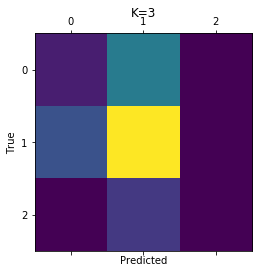

In [154]:
plot_conf_mat(Y_test, yPred, 'K=3')

In [155]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
Y_pred = mnb.predict(X_test)
accMNB = accuracy_score(Y_test.astype(int), Y_pred.astype(int))
print('Accuracy: ',accMNB)

Accuracy:  0.6521739130434783


In [156]:
import operator
print('Predicted : '+ repr(Y_pred) + 'Actual: ' + repr(Y_test))

Predicted : array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2.])Actual: array([2., 2., 2., 2., 1., 2., 3., 2., 3., 1., 2., 2., 2., 1., 2., 2., 2.,
       2., 1., 1., 1., 2., 2.])


In [157]:
clfSVC = SVC(kernel = 'rbf')
clfSVC.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [158]:
y_pred = clfSVC.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.6521739130434783


In [159]:
confusion_matrix(Y_test,y_pred)

array([[ 0,  6,  0],
       [ 0, 15,  0],
       [ 0,  2,  0]], dtype=int64)